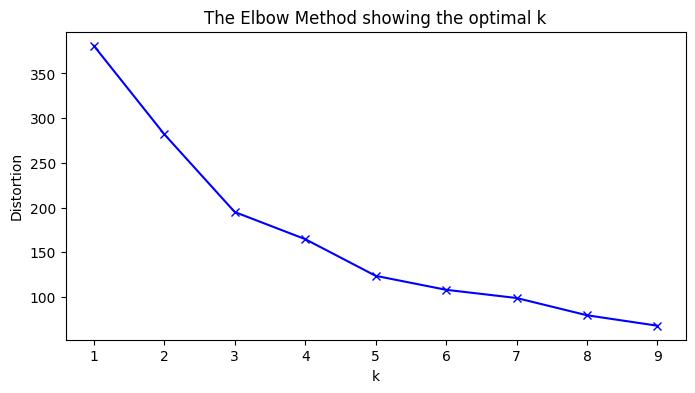

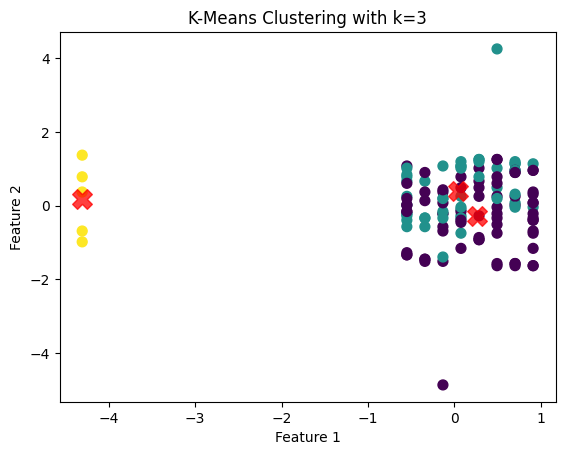

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data from an Excel file
file_path = '/content/student_admission_record_dirty.xlsx'
data = pd.read_excel(file_path)

# Filter the relevant columns and drop rows with missing values
filtered_data = data[['Age', 'Admission Test Score', 'High School Percentage']].dropna()

# Extracting features for clustering
X = filtered_data.values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to visualize the cluster centers
def plot_clusters(X, y_kmeans, centers, title):
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Finding the best K using the Elbow method
def elbow_method(X):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

# Using the Elbow method to find the best k
elbow_method(X_scaled)

# Choosing k=3 for demonstration (can choose based on elbow method)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
centers = kmeans.cluster_centers_

# Visualizing the clusters and their centers
plot_clusters(X_scaled, y_kmeans, centers, 'K-Means Clustering with k=3')

# Saving the results back to Excel
results = pd.DataFrame({'Age': filtered_data['Age'],
                       'Admission Test Score': filtered_data['Admission Test Score'],
                       'High School Percentage': filtered_data['High School Percentage'],
                       'Cluster': y_kmeans})
output_file_path = '/content/student_admission_clusters.xlsx'
results.to_excel(output_file_path, index=False)
